In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('insurance.csv')
data.head()  #getting head from the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
1154,48,female,27.930,4,no,northwest,11015.17470
518,35,female,31.000,1,no,southwest,5240.76500
178,46,female,28.900,2,no,southwest,8823.27900
477,25,male,35.625,0,no,northwest,2534.39375
473,47,female,33.345,0,no,northeast,20878.78443
15,19,male,24.600,1,no,southwest,1837.23700
279,51,female,21.560,1,no,southeast,9855.13140
80,31,male,26.885,1,no,northeast,4441.21315
528,46,male,39.425,1,no,northeast,8342.90875
321,26,female,29.640,4,no,northeast,24671.66334


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#data exploration

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

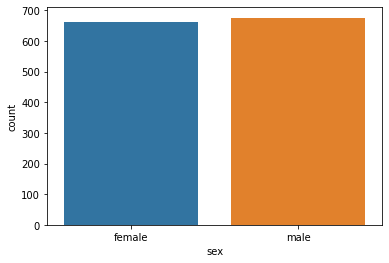

In [6]:
print(data['sex'].value_counts())
sns.countplot(x='sex',data=data)
#number of male and females are almost same

no     1064
yes     274
Name: smoker, dtype: int64


<AxesSubplot:xlabel='smoker', ylabel='count'>

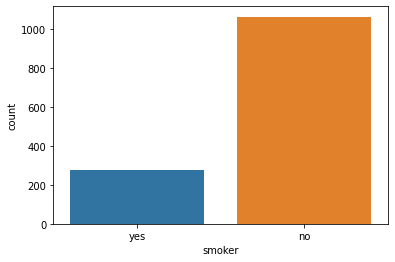

In [7]:
print(data['smoker'].value_counts())
sns.countplot(x='smoker',data=data)
#only 20% of the people are smokers

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


<AxesSubplot:xlabel='region', ylabel='count'>

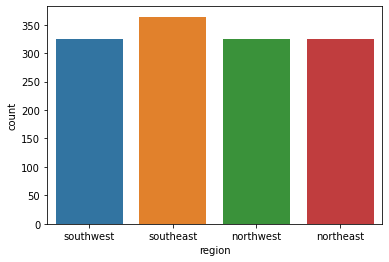

In [8]:
print(data['region'].value_counts())
sns.countplot(x='region',data=data)
#all the regions are almost the same with southeast having slightly high number of people

In [9]:
#label encoding all the categorical variables
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


<AxesSubplot:>

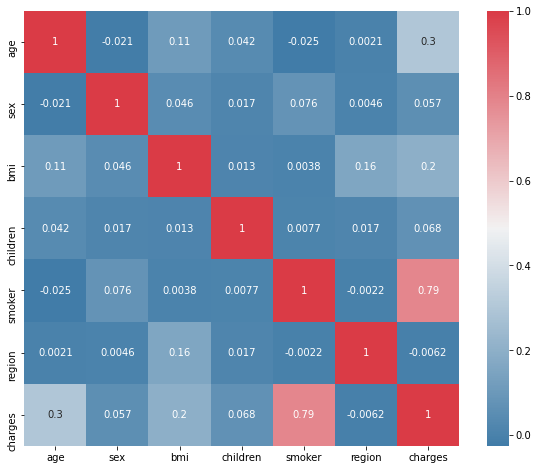

In [10]:
#checking correlation of the features with our target variable
print(data.corr()['charges'].sort_values())
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True,annot=True, ax=ax)
#there is a strong correlation between smoker

<AxesSubplot:xlabel='charges', ylabel='Count'>

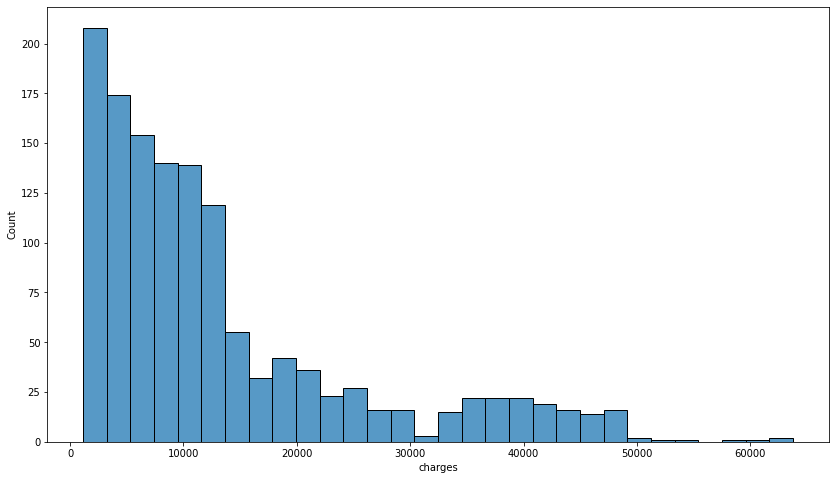

In [11]:
plt.figure(figsize=(14,8))
sns.histplot(data=data,x='charges')
#most of the people have charges between 0 to 10000 and the people keep decreasing as the charges increase

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

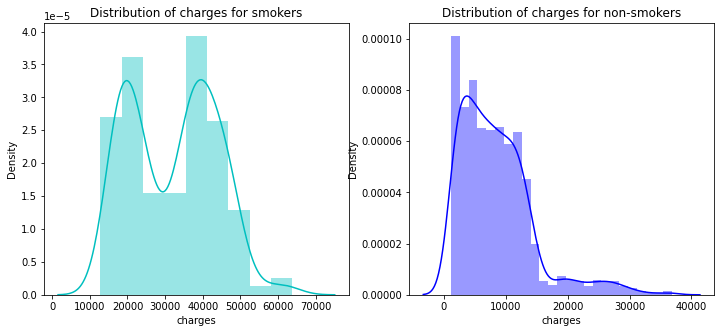

In [12]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
#people who smoke tend to spend more on treatments than non smokers.

'more men smoke (sex 0 means men) so we can also assume that the charges of treatment for men would be more compared to women'

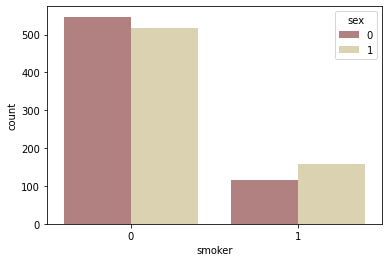

In [13]:
sns.countplot(x="smoker",hue = 'sex', palette="pink", data=data,)
"""more men smoke (sex 0 means men) so we can also assume that the charges of treatment for men would be more compared to women"""

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

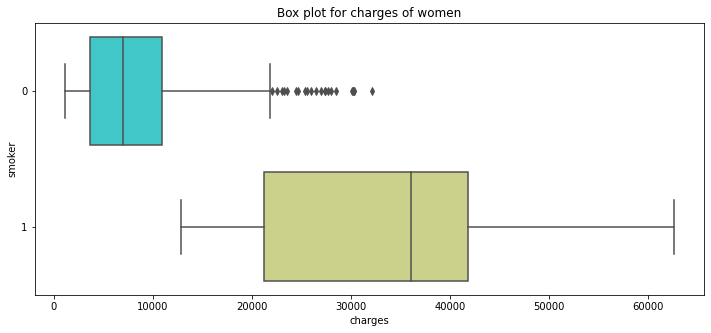

In [14]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

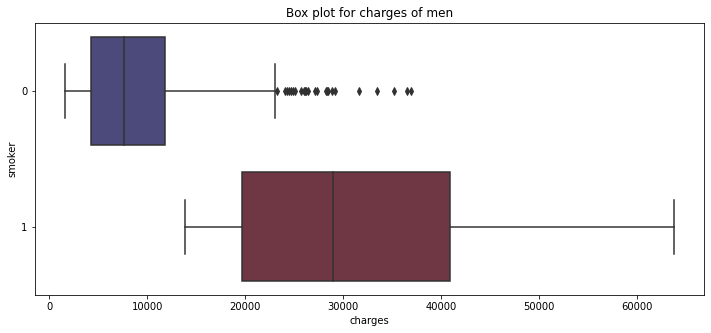

In [15]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'icefire')

"most of the people in the dataset are 20-25 years old and minimum age is 18 while 64 being highest . Now let's take a look at how many of 18 years old are smokers"

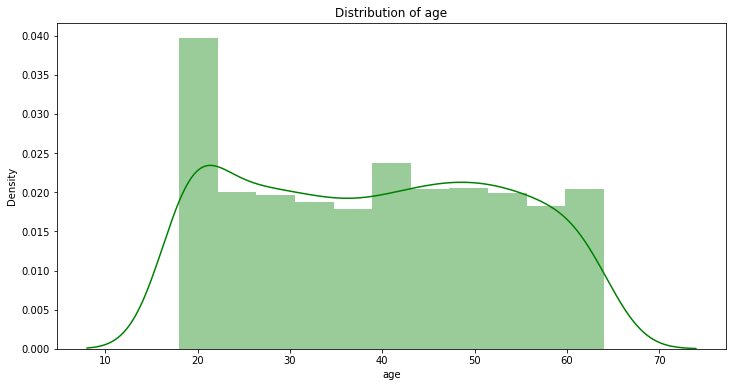

In [16]:
# let's see how the age affects the cost of patients
plt.figure(figsize=(12,6))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')
"""most of the people in the dataset are 20-25 years old and minimum age is 18 while 64 being highest . Now let's take a look at how many of 18 years old are smokers"""

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

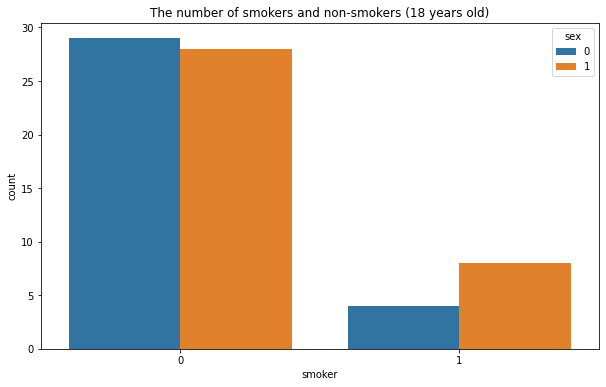

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="smoker",hue='sex', data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")
#there are a few 18 year olds (both male and female) that are smokers

"for people who don't smoke the cost increases with their age but we don't see such dependencies for smokers."

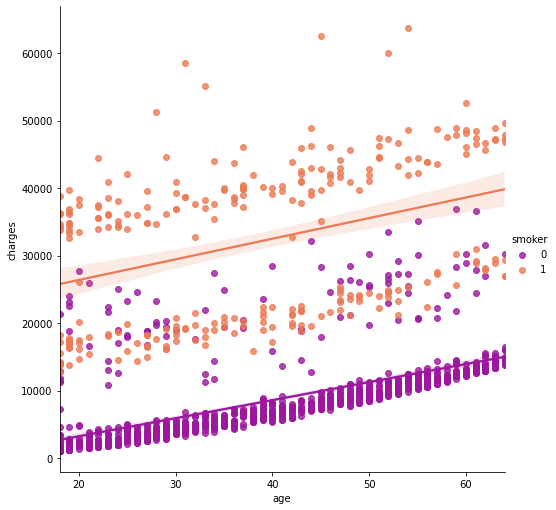

In [18]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'plasma', size = 7)
ax.set_title('Smokers and non-smokers')
"""for people who don't smoke the cost increases with their age but we don't see such dependencies for smokers."""

"from the below distplot , the average BMI of the person present in the dataset is 30. Now let's try to see the affect of BMI on their charges"

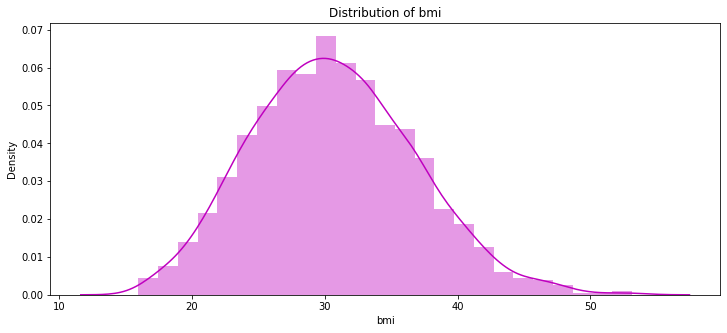

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')
"""from the below distplot , the average BMI of the person present in the dataset is 30. Now let's try to see the affect of BMI on their charges"""

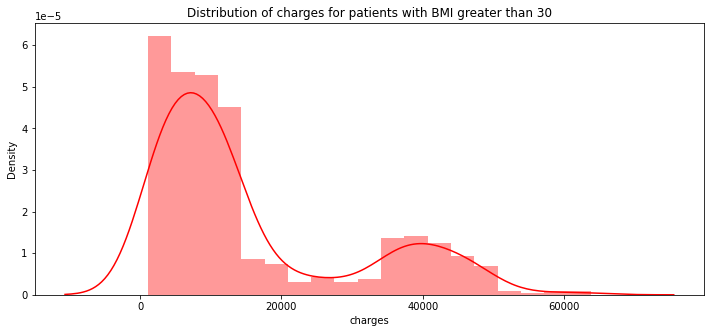

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'r')

'people with BMI greater than 30 tend to spend more on treatments'

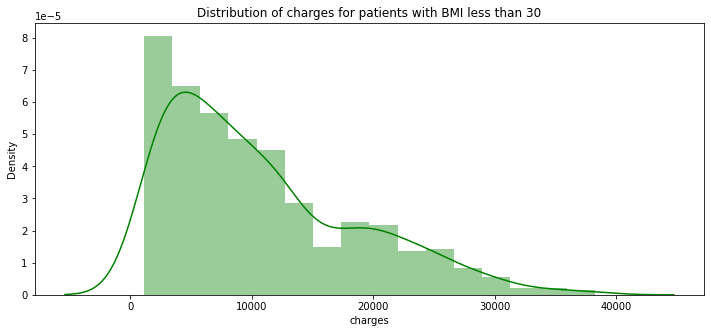

In [21]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'g')
"""people with BMI greater than 30 tend to spend more on treatments"""

<AxesSubplot:xlabel='children', ylabel='count'>

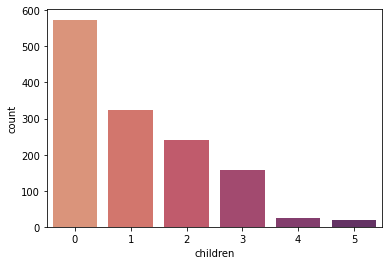

In [22]:
sns.countplot(x="children", palette="flare", data=data,)
# the number of children present in our dataset
#most of our patients (about 600) don't have kids and a few having 4,5 kids

In [23]:
#algorithms

In [24]:
R2_Scores = []
models = ['Linear Regression', 'RandomForest Regression','XGBoost Regressor']

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#splitting the data into training and testing
x = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 42)
# Linear Regression
lin_reg =make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10)
y_pred = lin_reg.predict(X_test)
print('')
print('     Linear Regression      ')
print('Score : %.4f' % lin_reg.score(X_test, y_test))
print( accuracies)
print('Mean score: %0.3f'% accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Linear Regression      
Score : 0.7669
[0.76057975 0.74872437 0.851063   0.74054515 0.73217062 0.67252427
 0.59195142 0.69646742 0.76155267 0.77433943]
Mean score: 0.733

MSE    : 35174149.33 
RMSE   : 5930.78 
R2     : 0.77 


In [26]:
# Random Forrest
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     Random Forest     
Score : 0.8481
[0.84284954 0.84739831 0.92200732 0.84739068 0.75536057 0.84959487
 0.71718213 0.76567214 0.81092844 0.84526058]
Mean: 0.820

MSE    : 22913996.23 
RMSE   : 4786.86 
R2     : 0.85 


In [27]:
# XGBoost
clf_xgb = XGBRegressor()
clf_xgb.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_xgb, X = X_train, y = y_train, cv = 10)
y_pred = clf_xgb.predict(X_test)
print('')
print('     XGBoost     ')
print('Score : %.4f' % clf_xgb.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)


     XGBoost     
Score : 0.8220
[0.82222606 0.82674198 0.90737372 0.80515995 0.72937903 0.81386368
 0.64091824 0.74800679 0.79968534 0.82117211]
Mean: 0.791

MSE    : 26862036.43 
RMSE   : 5182.86 
R2     : 0.82 


In [28]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

,Algorithms,R2-Scores
1,RandomForest Regression,0.848142
2,XGBoost Regressor,0.821977
0,Linear Regression,0.766891


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2','sqrt'],
               'n_estimators': [10,25,50,100]}

g_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [30]:
#finding the best parameters for our model
g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [32]:
# Random Forrest
clf_rf = RandomForestRegressor(bootstrap=True,max_depth=5,max_features=6,n_estimators=100)
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 10)
y_pred = clf_rf.predict(X_test)
print('')
print('     Random Forest     ')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('Mean: %0.3f' % accuracies.mean())

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print('')
print('MSE    : %0.2f ' % mse)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
#R2 score increased by 0.1 and the Mean score increased by 0.2 after tuning the hyperparameters.


     Random Forest     
Score : 0.8599
[0.88635167 0.84572511 0.9455798  0.87735104 0.79183743 0.86868932
 0.74417447 0.8130864  0.84284783 0.8614648 ]
Mean: 0.848

MSE    : 21140019.16 
RMSE   : 4597.83 
R2     : 0.86 
